In [1]:
import numpy as np
import xgboost as xgb
import pandas as pd
#import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.preprocessing as skp
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.svm as sksvm
import sklearn.ensemble as sken
import statsmodels.api as sm
import os, sys
%matplotlib inline

In [2]:
df=pd.read_csv('autos.csv', encoding='Latin1', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null datetime64[ns]
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null datetime64[ns]
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSe

In [5]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
nrOfPictures                    int64
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

In [6]:
for i in df.columns[df.dtypes=='object']:
    print(i)
    print(df[i].value_counts())
    print()
    print()

name
Ford_Fiesta                                                           657
BMW_318i                                                              627
Opel_Corsa                                                            622
Volkswagen_Golf_1.4                                                   603
BMW_316i                                                              523
BMW_320i                                                              492
Volkswagen_Polo                                                       475
Renault_Twingo                                                        447
Volkswagen_Golf                                                       428
Volkswagen_Golf_1.6                                                   413
Volkswagen_Polo_1.2                                                   412
BMW_116i                                                              394
Opel_Corsa_1.2_16V                                                    373
Opel_Corsa_B                     

In [18]:
df.nrOfPictures.value_counts()

0    371528
Name: nrOfPictures, dtype: int64

In [7]:
cont_cols=df.columns[df.dtypes!='object']

In [8]:
cont_cols

Index(['dateCrawled', 'price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [116]:
cols_to_plot=['price', 'powerPS', 'kilometer', 'monthOfRegistration']
len(cols_to_plot)

4

In [117]:
df[cols_to_plot].skew()

price                  578.059084
powerPS                 58.199909
kilometer               -1.551577
monthOfRegistration      0.079108
dtype: float64

In [12]:
df.shape, df.sample(frac=0.05, random_state=1, axis=0).shape

((371528, 20), (18576, 20))

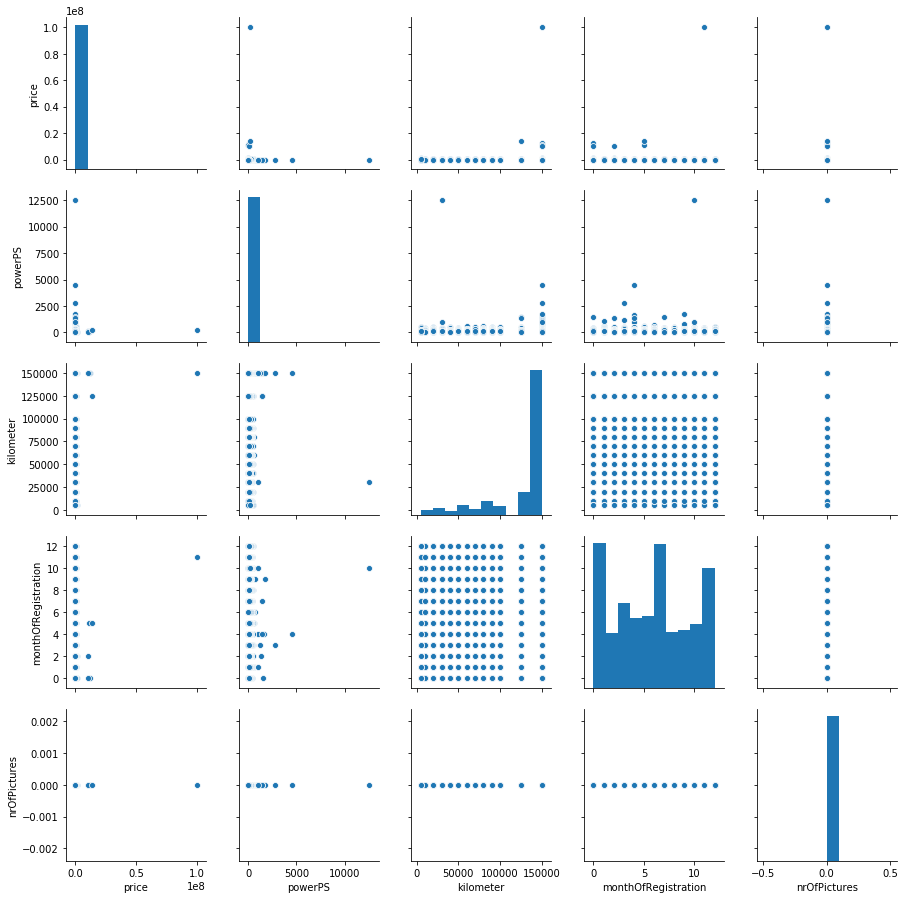

In [13]:
sns.pairplot(df.sample(frac=0.05, random_state=1, axis=0)[cols_to_plot])

In [20]:
df_norm=df.dropna().copy()
df_norm[cols_to_plot]=stats.zscore(df_norm[cols_to_plot])
df_norm.shape, df_norm.sample(frac=0.05, random_state=1, axis=0).shape

((260956, 20), (13048, 20))

In [21]:
df_norm.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,-0.019541,test,kleinwagen,2001,manuell,-0.353341,golf,0.651005,-0.052588,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,-0.013424,test,kleinwagen,2008,manuell,-0.394641,fabia,-0.854713,0.235484,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,-0.022017,test,limousine,1995,manuell,-0.167489,3er,0.651005,1.099700,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,-0.017502,test,cabrio,2004,manuell,-0.119305,2_reihe,0.651005,0.523556,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,-0.023910,test,limousine,1980,manuell,-0.525425,andere,-2.109478,0.235484,benzin,volkswagen,nein,2016-03-21,0,19348,2016-03-25 16:47:58


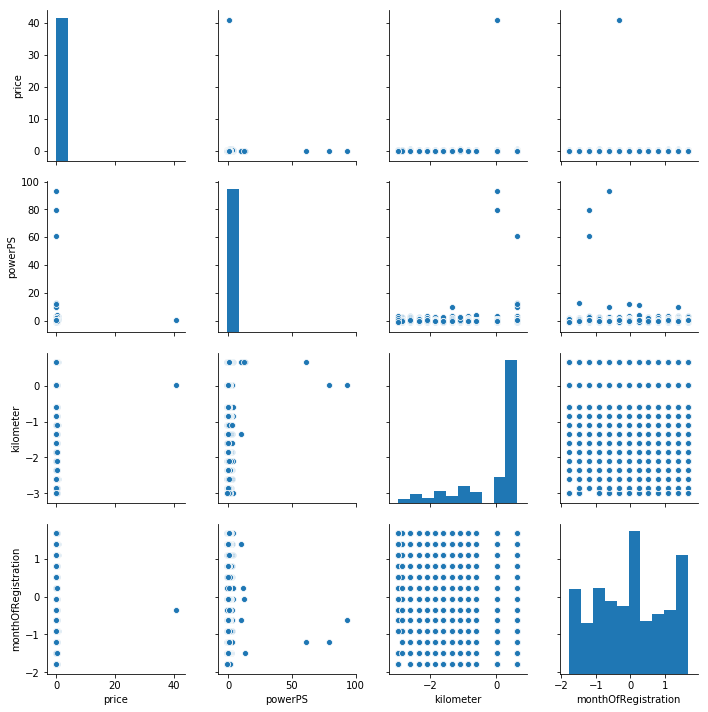

In [22]:
sns.pairplot(df_norm.sample(frac=0.05, random_state=1, axis=0)[cols_to_plot])

In [23]:
df.price.describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

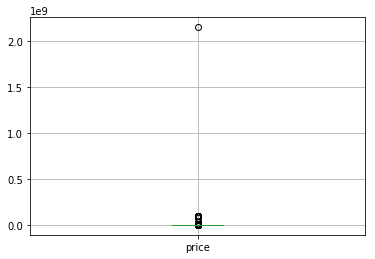

In [26]:
df.boxplot(['price'])

In [28]:
df.loc[df.price.argmax()]

C:\Users\michaelhsieh\AppData\Local\conda\conda\envs\xgboost\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


dateCrawled                2016-03-11 08:37:57
name                   Kaufe_AUTOS_Zum_basteln
seller                                  privat
offerType                              Angebot
price                               2147483647
abtest                                    test
vehicleType                             andere
yearOfRegistration                        1996
gearbox                                manuell
powerPS                                    888
model                                      NaN
kilometer                               150000
monthOfRegistration                          1
fuelType                                andere
brand                           sonstige_autos
notRepairedDamage                           ja
dateCreated                2016-03-11 00:00:00
nrOfPictures                                 0
postalCode                                4720
lastSeen                   2016-03-20 11:45:35
Name: 129969, dtype: object

In [24]:
df_norm.price.describe()

count    2.609560e+05
mean    -4.356552e-19
std      1.000002e+00
min     -2.391036e-02
25%     -1.954111e-02
50%     -1.269595e-02
75%      1.140001e-03
max      2.912593e+02
Name: price, dtype: float64

In [30]:
df.drop(labels=129969, axis=0).shape, df.shape

((371527, 20), (371528, 20))

In [31]:
df_norm=df.drop(labels=129969, axis=0).dropna().copy()
df_norm[cols_to_plot]=stats.zscore(df_norm[cols_to_plot])
df_norm.shape, df_norm.sample(frac=0.05, random_state=1, axis=0).shape

((260956, 20), (13048, 20))

In [33]:
df_norm.price.describe()

count    2.609560e+05
mean    -4.356552e-19
std      1.000002e+00
min     -2.391036e-02
25%     -1.954111e-02
50%     -1.269595e-02
75%      1.140001e-03
max      2.912593e+02
Name: price, dtype: float64

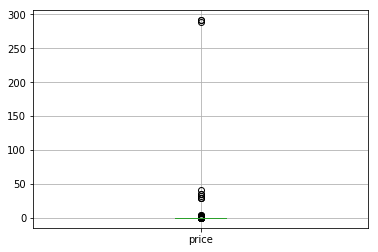

In [32]:
df_norm.boxplot('price')

In [36]:
df.sort_values(by='price', ascending=False).head(30)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
129969,2016-03-11 08:37:57,Kaufe_AUTOS_Zum_basteln,privat,Angebot,2147483647,test,andere,1996,manuell,888,NaN,150000,1,andere,sonstige_autos,ja,2016-03-11,0,4720,2016-03-20 11:45:35
127820,2016-03-14 17:49:54,audi_a6_c5_avant,privat,Angebot,99999999,test,kombi,1999,manuell,165,a6,5000,12,benzin,audi,nein,2016-03-14,0,28325,2016-03-14 17:49:54
77520,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,privat,Angebot,99999999,control,limousine,1999,automatik,224,s_klasse,150000,9,benzin,mercedes_benz,NaN,2016-03-22,0,73525,2016-04-06 05:15:30
150909,2016-04-02 22:41:54,Suche_Autos_Model_egal_welches,privat,Angebot,99999999,test,NaN,1990,NaN,0,NaN,5000,1,NaN,sonstige_autos,NaN,2016-04-02,0,6124,2016-04-02 22:41:54
56973,2016-03-18 18:52:27,tausche_ford_mondeo_mk3_ghia_gegen_anderes_auto,privat,Angebot,99999999,control,limousine,2002,manuell,131,mondeo,150000,1,NaN,ford,NaN,2016-03-18,0,27574,2016-03-18 18:52:27
246635,2016-03-25 11:55:36,Suche_Vw_Passat..........,privat,Angebot,99999999,test,NaN,2000,NaN,0,passat,5000,0,NaN,volkswagen,NaN,2016-03-25,0,7749,2016-04-02 15:15:54
189737,2016-04-03 12:41:33,Oldtimer_Goggo_Transporter,privat,Angebot,99999999,control,kleinwagen,1956,manuell,15,NaN,150000,9,benzin,sonstige_autos,nein,2016-04-03,0,86899,2016-04-03 12:41:33
362782,2016-03-06 10:38:42,Passat_35i_1.8_90ps_Kombi_frisch_lackiert_!,privat,Angebot,99999999,test,NaN,1995,NaN,0,passat,150000,0,benzin,volkswagen,NaN,2016-03-06,0,1809,2016-03-20 08:18:07
108987,2016-03-29 00:38:37,Biete_Hier_zum_Tauschen_an_aber_nur_realistisc...,privat,Angebot,99999999,test,NaN,2017,manuell,110,golf,150000,0,NaN,volkswagen,NaN,2016-03-28,0,35447,2016-04-05 14:16:25
160530,2016-03-29 12:58:27,Golf_4_schrott,privat,Angebot,99999999,test,kleinwagen,2001,NaN,0,golf,20000,0,benzin,volkswagen,NaN,2016-03-29,0,23992,2016-03-29 12:58:27


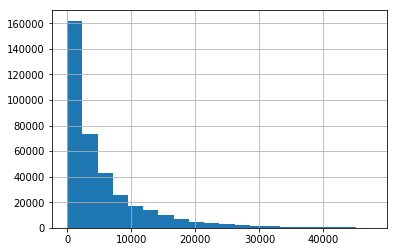

In [49]:
df[df.price<=df.price.quantile(0.995)].price.hist(bins=20)

In [51]:
df[df.price<=df.price.quantile(0.995)].shape, df.shape

((369669, 20), (371528, 20))

In [63]:
df[df.price>df.price.quantile(0.9998)].sort_values(by='price', ascending=True).head(70)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
16889,2016-03-15 16:45:45,Ford_Mondeo_Kombi_TÜV_abgelaufen,privat,Angebot,1000000,control,kombi,1998,NaN,0,mondeo,150000,0,benzin,ford,ja,2016-03-15,0,26607,2016-03-15 16:45:45
306469,2016-03-17 12:06:35,Vw_Polo_86c_Schrott_Karosse,privat,Angebot,1000000,control,coupe,1985,manuell,75,polo,150000,0,benzin,volkswagen,ja,2016-03-17,0,56410,2016-03-18 18:32:52
312109,2016-04-05 11:50:18,A3_zu_verkaufen_fuer_1.000.000_Euro,privat,Angebot,1000000,test,NaN,2000,NaN,0,a3,150000,0,NaN,audi,NaN,2016-04-05,0,49635,2016-04-05 11:50:18
45833,2016-03-15 10:53:11,Porsche_911_Turbo__930_,privat,Angebot,1000000,control,coupe,1981,manuell,300,911,150000,1,benzin,porsche,nein,2016-03-15,0,10969,2016-03-22 09:18:05
53507,2016-03-11 18:57:57,Suzuki_SJ_Samurai_413_Van__Kein_Lada_Niva_,privat,Angebot,1000000,test,suv,1992,manuell,69,andere,100000,0,benzin,suzuki,nein,2016-03-11,0,45711,2016-04-05 21:17:47
173279,2016-03-07 21:36:25,12345678911,privat,Angebot,1010010,control,NaN,2017,manuell,101,zafira,150000,9,diesel,opel,nein,2016-03-07,0,71254,2016-03-08 14:20:12
106651,2016-03-11 22:54:08,SUCHE_PKW_MIT_TÜV_MIN2_MONATE,privat,Angebot,1111111,control,NaN,2000,NaN,0,NaN,150000,0,NaN,sonstige_autos,nein,2016-03-11,0,29640,2016-03-18 00:45:13
57594,2016-03-25 09:56:28,Astra_f_teile,privat,Angebot,1111111,test,NaN,1995,manuell,71,astra,150000,5,benzin,opel,NaN,2016-03-25,0,67700,2016-04-06 09:46:21
167750,2016-03-22 12:54:19,Bmw_530d_zum_ausschlachten,privat,Angebot,1234566,control,kombi,1999,automatik,190,NaN,150000,2,diesel,bmw,NaN,2016-03-22,0,17454,2016-04-02 03:17:32
20143,2016-03-18 00:55:53,Porsche_911R_Einer_von_911,privat,Angebot,1250000,test,coupe,2016,manuell,500,911,5000,3,benzin,porsche,nein,2016-03-17,0,70435,2016-03-20 04:48:27


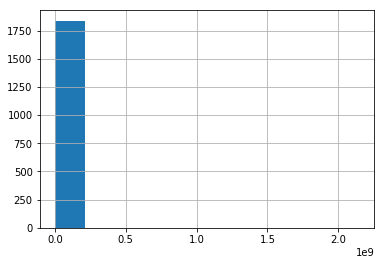

In [54]:
df[df.price>df.price.quantile(0.995)].price.hist()

In [62]:
df[df.price==12345678].shape

(9, 20)

In [70]:
df[df.price==0].shape

(10778, 20)

In [75]:
df[(df.price>0)&(df.price!=12345678)&(df.price<2147483647)].shape, df.shape

((360740, 20), (371528, 20))

{'whiskers': [<matplotlib.lines.Line2D at 0x22a5c0a4208>,
 'caps': [<matplotlib.lines.Line2D at 0x22a5c0a4ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a5c0a40b8>],
 'medians': [<matplotlib.lines.Line2D at 0x22a5c0ae358>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a5c0ae780>],
 'means': []}

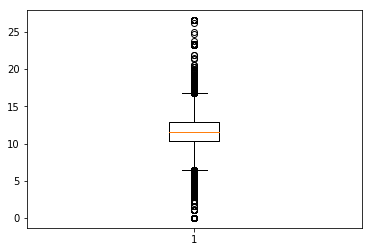

In [82]:
condition=(df.price>0)&(df.price!=12345678)&(df.price<2147483647)
plt.boxplot(df[condition].price.apply(np.log2))

In [87]:
df.loc[df[condition].index, 'log_price'] = df[condition].price.apply(np.log2)
df.drop(labels='log(price)', axis=1, inplace=True)

In [88]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,log_price
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57,8.906891
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,14.159556
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46,13.258566
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,10.550747
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,11.813781


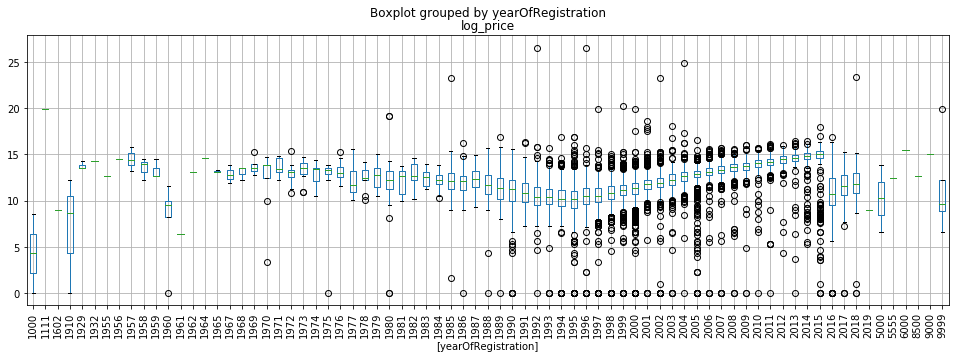

In [133]:
df.query('brand == "bmw"').boxplot(column=['log_price'], by=['yearOfRegistration'], rot=90, figsize=(16,5))

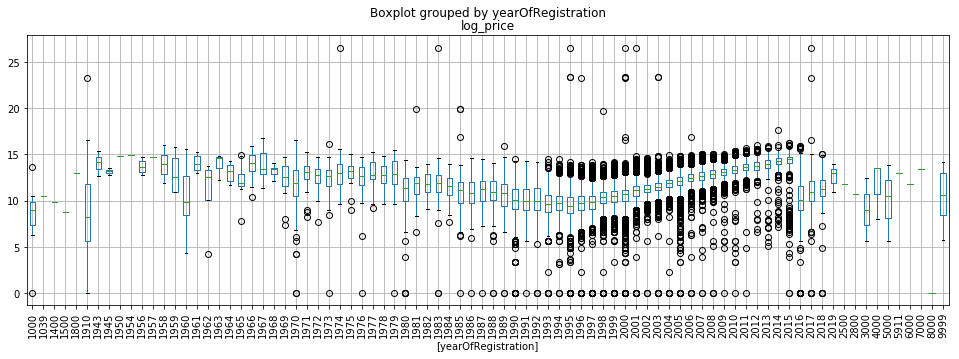

In [132]:
df.query('brand == "volkswagen"').boxplot(column=['log_price'], by=['yearOfRegistration'], rot=90, figsize=(16,5))

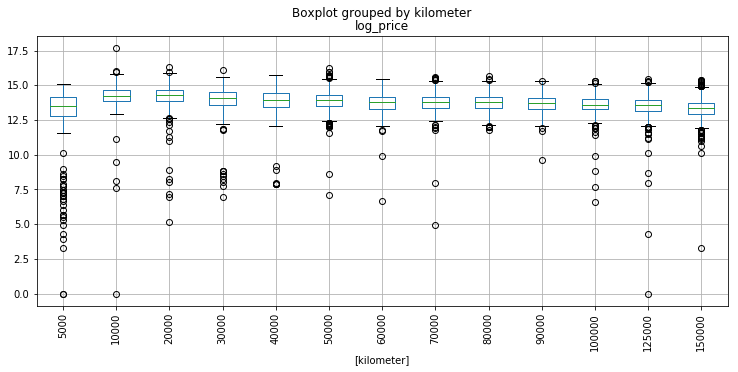

In [136]:
df.query('brand == "volkswagen" and yearOfRegistration >= 2010 and yearOfRegistration < 2016').boxplot(column=['log_price'],
                                                        by=['kilometer'], rot=90, figsize=(12,5))

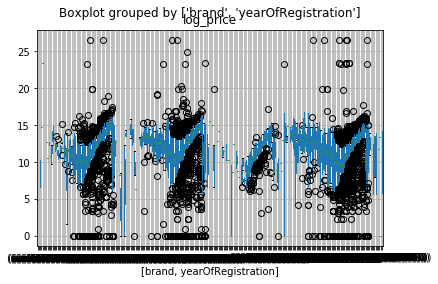

In [128]:
df.query('brand in ["volkswagen", "skoda", "bmw", "audi"]').boxplot(column=['log_price'], by=['brand', 'yearOfRegistration'])

In [90]:
df[df.price==0][['price', 'log_price']].head()

,price,log_price
7,0,NaN
40,0,NaN
115,0,NaN
119,0,NaN
157,0,NaN


In [154]:
cols_to_plot=['log_price', 'powerPS', 'kilometer', 'yearOfRegistration']
df_norm=df.dropna().copy()
df_norm[cols_to_plot]=stats.zscore(df_norm[cols_to_plot])
df.shape, df_norm.shape, df_norm.sample(frac=0.05, random_state=1, axis=0).shape

((371528, 21), (257565, 21), (12878, 21))

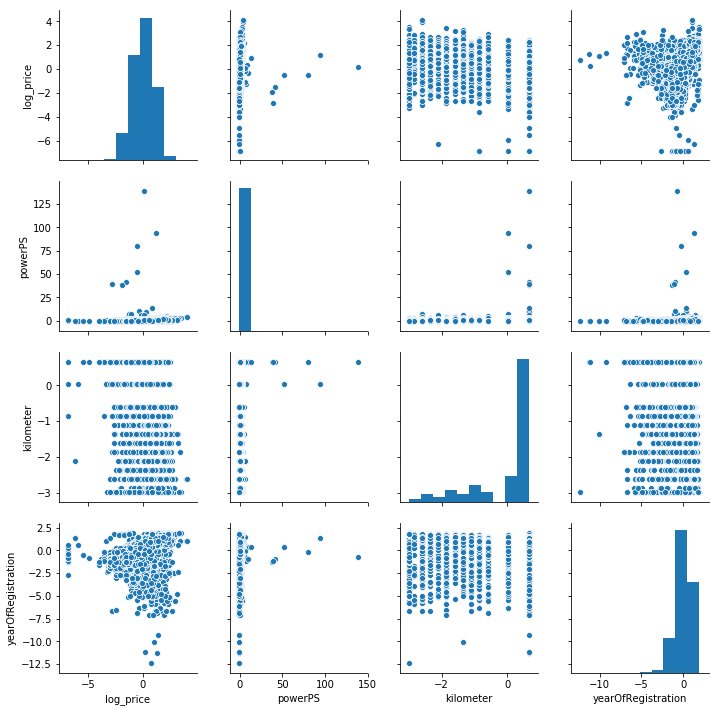

In [155]:
sns.pairplot(df_norm.sample(frac=0.1, random_state=1, axis=0)[cols_to_plot])

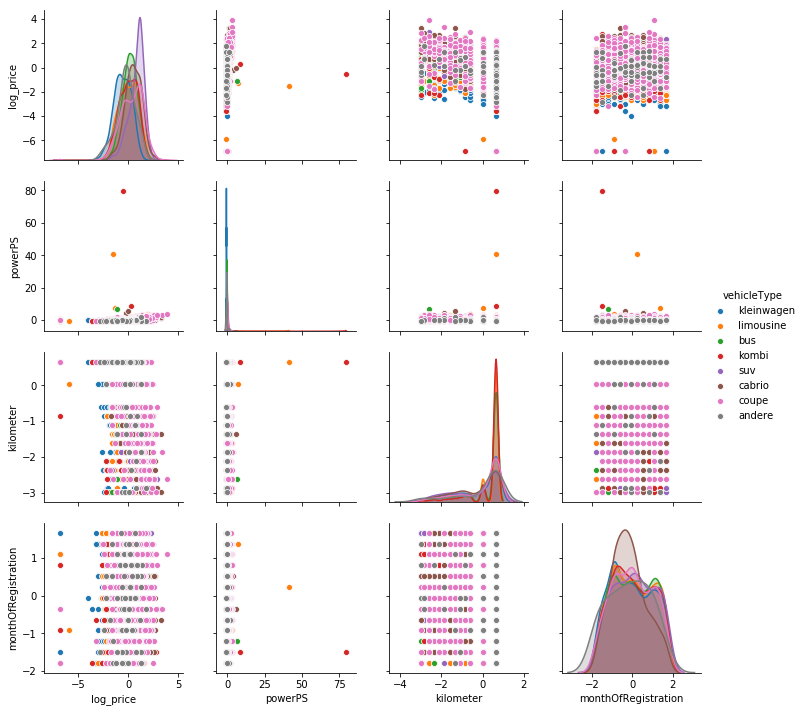

In [100]:
cols_to_plot=['log_price', 'powerPS', 'kilometer', 'monthOfRegistration', 'vehicleType']
sns.pairplot(df_norm.sample(frac=0.05, random_state=1, axis=0)[cols_to_plot], hue='vehicleType')

In [156]:
df_norm[cols_to_plot].corr()

,log_price,powerPS,kilometer,yearOfRegistration
log_price,1.000000,0.247985,-0.423682,0.573493
powerPS,0.247985,1.000000,-0.017600,0.103694
kilometer,-0.423682,-0.017600,1.000000,-0.399516
yearOfRegistration,0.573493,0.103694,-0.399516,1.000000


In [157]:
df_norm[cols_to_plot].kurt()

log_price                2.511132
powerPS               7916.599016
kilometer                0.623231
yearOfRegistration       6.271607
dtype: float64

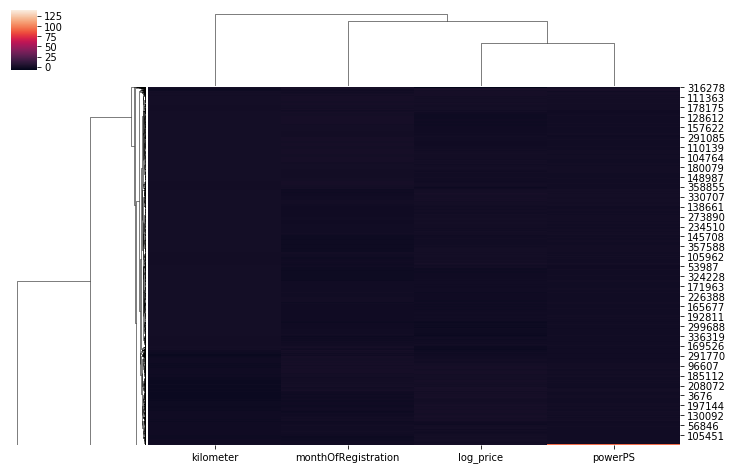

In [98]:
g = sns.clustermap(df_norm.sample(frac=0.1, random_state=1, axis=0)[cols_to_plot], method='average', 
                   metric='cityblock', figsize=(12,8))

In [111]:
def evaluate_clf(clf, x, y, cv=None):
    if cv is None:
        clf.fit(x, y)
        pred=clf.predict(x)
        t = 'Full modelling:'
    else:
        pred = skms.cross_val_predict(clf, x, y, cv=cv, n_jobs=2)
        t = 'XVal %s:' % cv
    print('MSE %s %.3f' % (t, skm.mean_squared_error(y, pred)))
    g=sns.scatterplot(x=y, y=pred)
    aa=np.linspace(y.min(), y.max())
    g.axes.plot(aa,aa, 'r')
    g.axes.set_ylim(y.min(), y.max())
    g.axes.set_xlim(y.min(), y.max())
    plt.show()

In [158]:
cols_to_eval=['kilometer', 'yearOfRegistration']

MSE XVal 10: 0.626


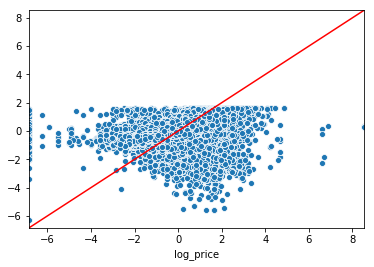

In [159]:
clf=sklm.LinearRegression()
evaluate_clf(clf, df_norm[cols_to_eval], df_norm['log_price'], cv=10)

MSE Full modelling: 0.432


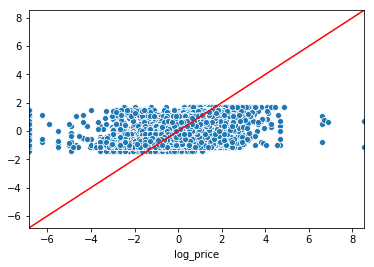

In [146]:
clf=sken.GradientBoostingRegressor(min_samples_leaf=50, min_samples_split=70, random_state=1)
evaluate_clf(clf, df_norm[cols_to_eval], df_norm['log_price'])

## TODO: 
1. dummify the categorical variables
2. Log transform skewed features too.

In [160]:
df_norm.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,log_price
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,-0.364459,manuell,-0.360058,...,0.653819,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,-0.744309
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,0.714274,manuell,-0.401970,...,-0.851105,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,-0.013989
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,-1.289088,manuell,-0.171454,...,0.653819,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07,-1.441911
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,0.097855,manuell,-0.122556,...,0.653819,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39,-0.424815
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,0.097855,manuell,-0.150498,...,0.653819,12,benzin,mazda,nein,2016-03-26,0,96224,2016-04-06 10:45:34,-0.504324


In [151]:
cont_cols

Index(['dateCrawled', 'price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [161]:
cat_cols=['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage', 'postalCode']
cont_cols=['price', 'log_price', 'yearOfRegistration', 'powerPS', 'kilometer']
new=pd.get_dummies(df_norm[cat_cols])
df_new=pd.concat([df_norm[cont_cols], new], axis=1)

In [162]:
df_new.head()

,price,log_price,yearOfRegistration,powerPS,kilometer,postalCode,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_ja,notRepairedDamage_nein
3,1500,-0.744309,-0.364459,-0.360058,0.653819,91074,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,3600,-0.013989,0.714274,-0.401970,-0.851105,60437,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,650,-1.441911,-1.289088,-0.171454,0.653819,33775,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,2200,-0.424815,0.097855,-0.122556,0.653819,67112,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10,2000,-0.504324,0.097855,-0.150498,0.653819,96224,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [163]:
all_cols=cols_to_eval+new.columns.tolist()

In [165]:
cols_to_eval

['kilometer', 'yearOfRegistration']

MSE XVal 10: 143.685


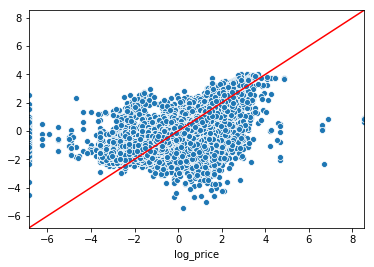

In [166]:
clf=sklm.LinearRegression()
evaluate_clf(clf, df_new[all_cols], df_new['log_price'], cv=10)

MSE XVal 5: 0.220


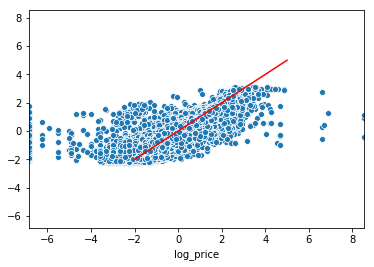

In [167]:
clf = xgb.XGBRegressor(n_jobs=2, random_state=1)
evaluate_clf_2(clf, df_new[all_cols], df_new['log_price'], cv=5)